<a href="https://colab.research.google.com/github/phuongnt3391/ClassificationKNNPython/blob/main/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving gene_expression.csv to gene_expression.csv


In [9]:
df = pd.read_csv(io.BytesIO(uploaded['gene_expression.csv']))
df.head()
X = df.drop('Cancer Present', axis=1)
y=df['Cancer Present']

**Data engineering**

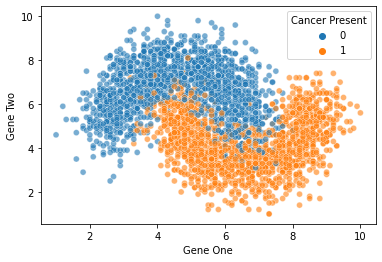

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present', alpha=0.6)

**Split the dataset into training set and test set**

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Scale the dataset**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)


**ELBOW METHOD**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_error_rate = []
for k in range(1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train,y_train)
  y_pred = knn_model.predict(scaled_X_test)
  test_error = 1-accuracy_score(y_test,y_pred)
  test_error_rate.append(test_error)
test_error_rate

[0.07999999999999996,
 0.0855555555555556,
 0.06666666666666665,
 0.06666666666666665,
 0.06777777777777783,
 0.06000000000000005,
 0.06555555555555559,
 0.061111111111111116,
 0.06555555555555559,
 0.06222222222222218,
 0.06666666666666665,
 0.06333333333333335,
 0.06555555555555559,
 0.06444444444444442,
 0.06666666666666665,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.06444444444444442,
 0.06222222222222218,
 0.06666666666666665,
 0.061111111111111116,
 0.05888888888888888,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116]

Text(0.5, 0, 'k neighbors')

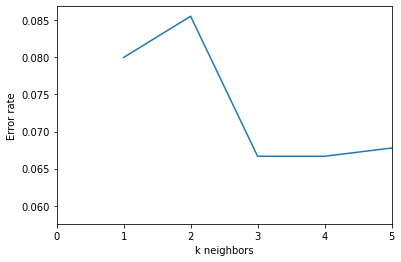

In [34]:
plt.plot(range(1,30),test_error_rate)
plt.xlim(0,5)
plt.ylabel('Error rate')
plt.xlabel('k neighbors')

From the Elbow method, let's choose k = 3 because at k=3, the Error rate drops substantially. Run the KNN model again with k = 3

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.94      0.93      0.94       477

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



Precision and recall is somewhat the same so I bet the dataset is not unbalanced between Cancer and No cancer cases. Let's check the number of Cancer present

In [27]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64